# Total of Hate Crime By Precinct (Comparing to Overall Total Crime Rate).
----

## Note
  
  ### There is no correlation between hate crime and total crime rate.
  ### Precinct 71 has the most hate arrest commited by count.
  ### Precinct 66 has the highest percentage in hate arrest committed.
  #### Overall Precinct 14 has most arrests in NYC.




In [1]:
%matplotlib notebook
#Make several queries to gather data
#Make dataframe by quarters in total 8.

#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sodapy import Socrata
from MyAppsToken import MyAppToken
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us","H1zifl7IkGjHmDxwbQMS6lRPs", 
                 username = "lmaldonado93@gmail.com",
                 password = "gJVmWBgNzS52Vwy")

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("8h9b-rp9u", limit = 700000, order="arrest_date desc")

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

results_df.head()

,age_group,arrest_boro,arrest_date,arrest_key,arrest_precinct,jurisdiction_code,ky_cd,latitude,law_cat_cd,law_code,longitude,ofns_desc,pd_cd,pd_desc,perp_race,perp_sex,x_coord_cd,y_coord_cd
0,45-64,K,2018-12-31T00:00:00.000,191703953,81,0,347,40.677026245000036,M,VTL11920U2,-73.92181884199994,INTOXICATED & IMPAIRED DRIVING,905,"INTOXICATED DRIVING,ALCOHOL",BLACK,M,1005936,185942
1,45-64,Q,2018-12-31T00:00:00.000,191692043,100,0,361,40.586231405000035,M,PL 2403002,-73.81601112099996,OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV,639,AGGRAVATED HARASSMENT 2,WHITE,F,1035354,152907
2,18-24,M,2018-12-31T00:00:00.000,191703279,14,0,113,40.75818729600008,F,PL 1701003,-73.98800312899994,FORGERY,729,"FORGERY,ETC.,UNCLASSIFIED-FELONY",BLACK,M,987574,215502
3,18-24,Q,2018-12-31T00:00:00.000,191703706,103,0,348,40.70059059000005,M,VTL05110A2,-73.80774319999993,VEHICLE AND TRAFFIC LAWS,922,"TRAFFIC,UNCLASSIFIED MISDEMEANOR",BLACK,F,1037559,194576
4,25-44,K,2018-12-31T00:00:00.000,191704095,67,0,341,40.662518015000046,M,PL 1552500,-73.92701180399997,PETIT LARCENY,339,"LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED",BLACK,M,1004500,180655


In [2]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 18 columns):
age_group            700000 non-null object
arrest_boro          700000 non-null object
arrest_date          700000 non-null object
arrest_key           700000 non-null object
arrest_precinct      700000 non-null object
jurisdiction_code    700000 non-null object
ky_cd                697772 non-null object
latitude             700000 non-null object
law_cat_cd           695920 non-null object
law_code             699955 non-null object
longitude            700000 non-null object
ofns_desc            697772 non-null object
pd_cd                699931 non-null object
pd_desc              697772 non-null object
perp_race            700000 non-null object
perp_sex             700000 non-null object
x_coord_cd           700000 non-null object
y_coord_cd           700000 non-null object
dtypes: object(18)
memory usage: 96.1+ MB


In [3]:
results_df["arrest_date"]= pd.to_datetime(results_df["arrest_date"])

In [4]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 18 columns):
age_group            700000 non-null object
arrest_boro          700000 non-null object
arrest_date          700000 non-null datetime64[ns]
arrest_key           700000 non-null object
arrest_precinct      700000 non-null object
jurisdiction_code    700000 non-null object
ky_cd                697772 non-null object
latitude             700000 non-null object
law_cat_cd           695920 non-null object
law_code             699955 non-null object
longitude            700000 non-null object
ofns_desc            697772 non-null object
pd_cd                699931 non-null object
pd_desc              697772 non-null object
perp_race            700000 non-null object
perp_sex             700000 non-null object
x_coord_cd           700000 non-null object
y_coord_cd           700000 non-null object
dtypes: datetime64[ns](1), object(17)
memory usage: 96.1+ MB


In [5]:
results_df.arrest_date.dt.year.value_counts()

2017    286225
2018    246773
2016    167002
Name: arrest_date, dtype: int64

In [44]:
results_2017_Q1 = results_df[(results_df["arrest_date"]> "2017-01-01") & (results_df["arrest_date"]< "2017-03-31")]

results_2017_Q1.to_csv("Resources/results_2017_Q1")

results_2017_Q2 = results_df[(results_df["arrest_date"]> "2017-04-01") & (results_df["arrest_date"]< "2017-06-30")]

results_2017_Q2.to_csv("Resources/results_2017_Q2")

results_2017_Q3 = results_df[(results_df["arrest_date"]> "2017-07-01") & (results_df["arrest_date"]< "2017-09-30")]

results_2017_Q3.to_csv("Resources/results_2017_Q3")

results_2017_Q4 = results_df[(results_df["arrest_date"]> "2017-10-01") & (results_df["arrest_date"]< "2017-12-31")]

results_2017_Q4.to_csv("Resources/results_2017_Q4")

results_2018 = results_df[(results_df["arrest_date"]> "2018-01-01") & (results_df["arrest_date"]< "2018-12-31")]

results_2018_Q1 = results_df[(results_df["arrest_date"]> "2018-01-01") & (results_df["arrest_date"]< "2018-03-31")]

results_2018_Q1.to_csv("Resources/results_2018_Q1")

results_2018_Q2 = results_df[(results_df["arrest_date"]> "2018-04-01") & (results_df["arrest_date"]< "2018-06-30")]

results_2018_Q2.to_csv("Resources/results_2018_Q2")

results_2018_Q3 = results_df[(results_df["arrest_date"]> "2018-07-01") & (results_df["arrest_date"]< "2018-09-30")]

results_2018_Q3.to_csv("Resources/results_2018_Q3")

results_2018_Q4 = results_df[(results_df["arrest_date"]> "2018-10-01") & (results_df["arrest_date"]< "2018-12-31")]

results_2018_Q4.to_csv("Resources/results_2018_Q4")

results_1718 = results_df[(results_df["arrest_date"]> "2017-01-01") & (results_df["arrest_date"]< "2018-12-31")]

results_1718.to_csv("Resources/results_1718")

In [51]:
hate_arrest_2017_Q1 = pd.read_csv("Resources/hate-crime-arrests-by-motivation-q1-2017.csv")

hate_arrest_2017_Q2 = pd.read_csv("Resources/hate-crime-arrests-by-motivation-q2-2017.csv")

hate_arrest_2017_Q3 = pd.read_csv("Resources/hate-crime-arrests-by-motivation-q3-2017.csv")

hate_arrest_2017_Q4 = pd.read_csv("Resources/hate-crime-arrests-by-motivation-q4-2017.csv")

hate_arrest_2018_Q1 = pd.read_csv("Resources/hate-crime-arrests-by-motivation-q1-2018.csv")

hate_arrest_2018_Q2 = pd.read_csv("Resources/hate-crime-arrests-by-motivation-q2-2018.csv")

hate_arrest_2018_Q3 = pd.read_csv("Resources/hate-crime-arrests-by-motivation-q3-2018.csv")

hate_arrest_2018_Q4 = pd.read_csv("Resources/hate-crime-arrests-by-motivation-q4-2018.csv")

Total_Hate_2017 = pd.read_csv("Resources/hate-crime-arrests-by-motivation-annual-2017.csv")

Total_Hate_2018 = pd.read_csv("Resources/hate-crime-arrests-by-motivation-annual-2018 (1).csv")


In [8]:
# Hate arrest by precints
group_17_q1 = hate_arrest_2017_Q1.groupby("Precinct")
count_17_q1 = group_17_q1["Number"].count()

simplify_17_q1 = pd.DataFrame({"17 Q1": count_17_q1})


group_17_q2 = hate_arrest_2017_Q2.groupby("Precinct")
count_17_q2 = group_17_q2["Number"].count()

simplify_17_q2 = pd.DataFrame({"17 Q2": count_17_q2})


group_17_q3 = hate_arrest_2017_Q3.groupby("Precinct")
count_17_q3 = group_17_q3["Number"].count()

simplify_17_q3 = pd.DataFrame({"17 Q3": count_17_q3})


group_17_q4 = hate_arrest_2017_Q4.groupby("Precinct")
count_17_q4 = group_17_q4["Number"].count()

simplify_17_q4 = pd.DataFrame({"17 Q4": count_17_q4})


group_18_q1 = hate_arrest_2018_Q1.groupby("Precinct")
count_18_q1 = group_18_q1["Number"].count()

simplify_18_q1 = pd.DataFrame({"18 Q1": count_18_q1})


group_18_q2 = hate_arrest_2018_Q2.groupby("Precinct")
count_18_q2 = group_18_q2["Number"].count()

simplify_18_q2 = pd.DataFrame({"18 Q2": count_18_q2})


group_18_q3 = hate_arrest_2018_Q3.groupby("Precinct")
count_18_q3 = group_18_q3["Number"].count()

simplify_18_q3 = pd.DataFrame({"18 Q3": count_18_q3})


group_18_q4 = hate_arrest_2018_Q4.groupby("Precinct")
count_18_q4 = group_18_q1["Number"].count()

simplify_18_q4 = pd.DataFrame({"18 Q4": count_18_q4})


In [9]:
merge_17_dfs = [simplify_17_q1,simplify_17_q2,simplify_17_q3,simplify_17_q4]
joined_17_df= pd.concat(merge_17_dfs,axis=1, sort=False)


transpose_17_df= joined_17_df.T
transpose_17_df.fillna(0)

merge_18_dfs = [simplify_18_q1,simplify_18_q2,simplify_18_q3,simplify_18_q4]
joined_18_df= pd.concat(merge_18_dfs,axis=1, sort=False)



transpose_18_df= joined_18_df.T
transpose_18_df.fillna(0)

merge_1718_dfs = [transpose_17_df, transpose_18_df]
joined_1718_dfs = pd.concat(merge_1718_dfs, axis=1, sort=False)

In [10]:
top_5_18 = joined_18_df.nlargest(5, "18 Q1")


trans_5_18 = top_5_18.T
fill_5_18 = trans_5_18.fillna(0)

In [11]:
top_5_17 = joined_17_df.nlargest(5, "17 Q1")


trans_5_17 = top_5_17.T
fill_5_17 = trans_5_17.fillna(0)

In [12]:
merged_dfs = [fill_5_17, fill_5_18]
joined_df= pd.concat(merged_dfs,axis=1, sort=False)
joined_df.head(50)

Precinct,14,120,7,61,71,17,18,71,111,13
17 Q1,10.0,3.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
17 Q2,1.0,0.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN
17 Q3,1.0,3.0,0.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN
17 Q4,1.0,3.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
18 Q1,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,1.0
18 Q2,NaN,NaN,NaN,NaN,NaN,1.0,2.0,7.0,0.0,1.0
18 Q3,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2.0,0.0,0.0
18 Q4,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,1.0


In [13]:
least_5_17 = joined_17_df.nsmallest(5, "17 Q1")
least_5_18 = joined_18_df.nsmallest(5, "18 Q1")
least_merged_dfs = [least_5_17, least_5_18]
leasts_joined_df= pd.concat(least_merged_dfs,axis=1, sort=False)
least_filled = leasts_joined_df.fillna(0)
T_least_filled= least_filled.T

In [14]:
#Total Arrest Overall
total_17_q1 = results_2017_Q1.groupby("arrest_precinct")
Tcount_17_q1 = total_17_q1["arrest_key"].count()
Tsimplify_17_q1 = pd.DataFrame({"17 Q1": Tcount_17_q1})

total_17_q2 = results_2017_Q2.groupby("arrest_precinct")
Tcount_17_q2 = total_17_q2["arrest_key"].count()
Tsimplify_17_q2 = pd.DataFrame({"17 Q2": Tcount_17_q2})

total_17_q3 = results_2017_Q3.groupby("arrest_precinct")
Tcount_17_q3 = total_17_q3["arrest_key"].count()
Tsimplify_17_q3 = pd.DataFrame({"17 Q3": Tcount_17_q3})

total_17_q4 = results_2017_Q4.groupby("arrest_precinct")
Tcount_17_q4 = total_17_q4["arrest_key"].count()
Tsimplify_17_q4 = pd.DataFrame({"17 Q4": Tcount_17_q4})

total_18_q1 = results_2018_Q1.groupby("arrest_precinct")
Tcount_18_q1 = total_18_q1["arrest_key"].count()
Tsimplify_18_q1 = pd.DataFrame({"18 Q1": Tcount_18_q1})

total_18_q2 = results_2018_Q2.groupby("arrest_precinct")
Tcount_18_q2 = total_18_q2["arrest_key"].count()
Tsimplify_18_q2 = pd.DataFrame({"18 Q2": Tcount_18_q2})

total_18_q3 = results_2018_Q3.groupby("arrest_precinct")
Tcount_18_q3 = total_18_q3["arrest_key"].count()
Tsimplify_18_q3 = pd.DataFrame({"18 Q3": Tcount_18_q3})

total_18_q4 = results_2018_Q4.groupby("arrest_precinct")
Tcount_18_q4 = total_18_q4["arrest_key"].count()
Tsimplify_18_q4 = pd.DataFrame({"18 Q4": Tcount_18_q4})


Tmerge_17_dfs = [Tsimplify_17_q1,Tsimplify_17_q2,Tsimplify_17_q3,Tsimplify_17_q4]
Tjoined_17_df= pd.concat(Tmerge_17_dfs,axis=1, sort=False)

Tmerge_18_dfs = [Tsimplify_18_q1,Tsimplify_18_q2,Tsimplify_18_q3,Tsimplify_18_q4]
Tjoined_18_df= pd.concat(Tmerge_18_dfs,axis=1, sort=False)

#get top 5 and least 5 for each df and get line graph to go with the aboves graphs.

TTdataframes = [Tjoined_17_df, Tjoined_18_df]
TTjoined_dfs= pd.concat(TTdataframes, axis=1, sort=False)
top_5 = TTjoined_dfs.nlargest(5, "17 Q1")
transposed_dfs= top_5.T

sum_TT_dfs = TTjoined_dfs.sum()
TT_sum_dfs = pd.DataFrame({"Total Arrest Overall" : sum_TT_dfs})

<IPython.core.display.Javascript object>


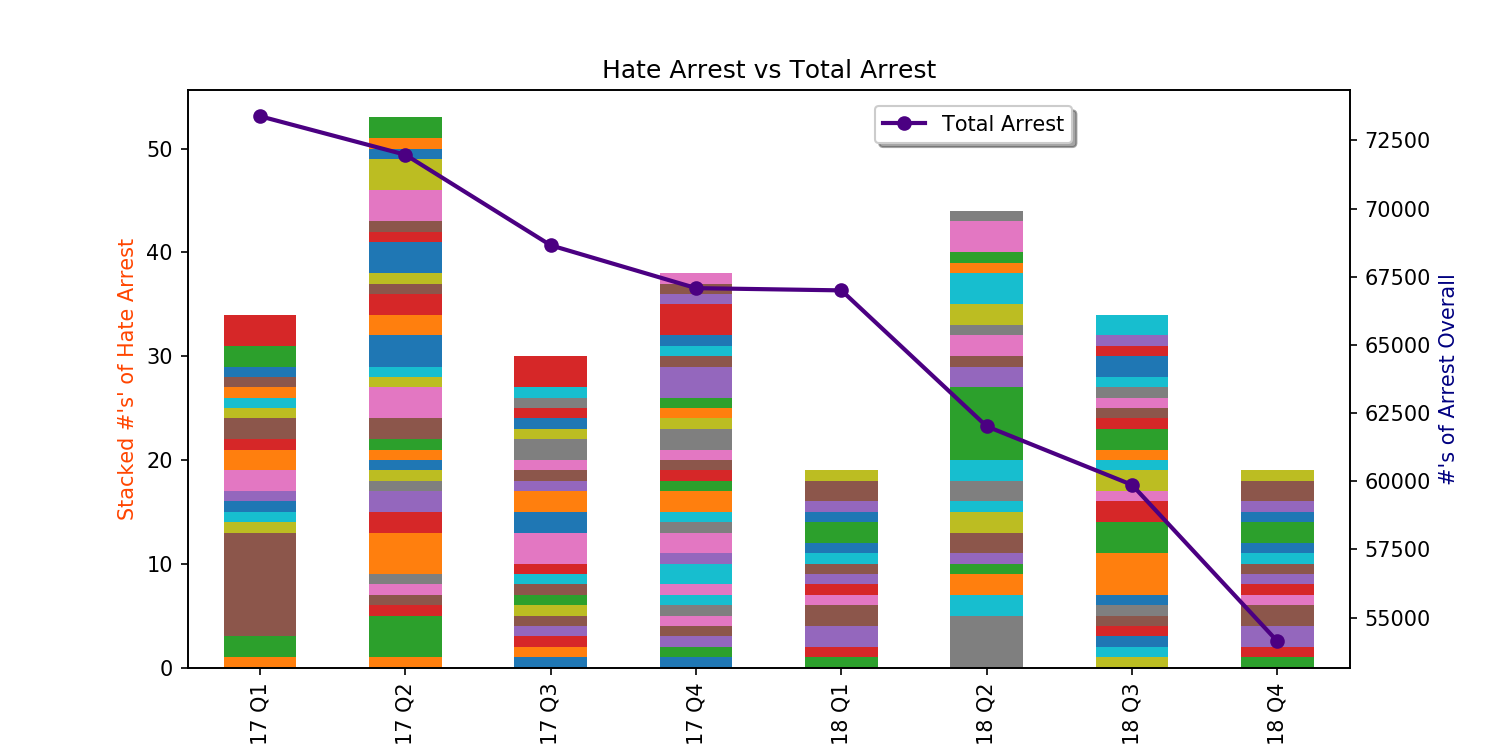

In [15]:
ax = joined_1718_dfs.plot(kind="bar", stacked= True, figsize=(10,5), legend=None)
ax.set_ylabel("Stacked #'s' of Hate Arrest", color="orangered")
ax.title.set_text("Hate Arrest vs Total Arrest")
ax2 = ax.twinx()
ax2.plot(TT_sum_dfs, linestyle='-', marker='o', linewidth=2.0, label='Total Arrest', color="indigo")
ax2.set_ylabel("#'s of Arrest Overall", color="navy")
ax2.legend(bbox_to_anchor = [.77, 0.99], shadow=True)
plt.show()

plt.savefig("Hate Arrest vs Total Arrest")

<IPython.core.display.Javascript object>


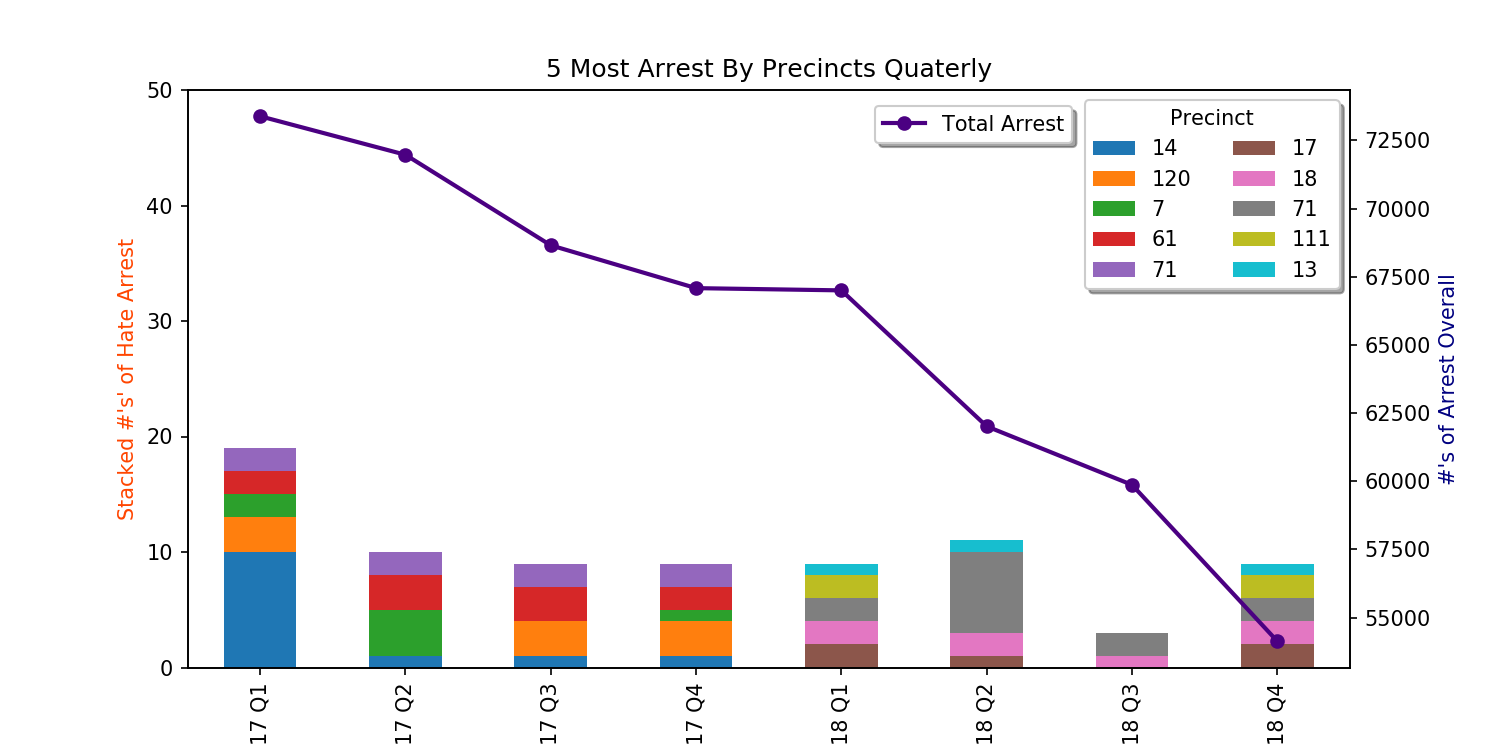

In [16]:
ax = joined_df.plot(kind="bar", stacked= True, figsize=(10,5))
ax.legend(loc='best',shadow=True, ncol=2, title = "Precinct")
ax.set_ylabel("Stacked #'s' of Hate Arrest", color="orangered")
ax.title.set_text("5 Most Arrest By Precincts Quaterly")
ax.set_ylim(0,50)
ax2 = ax.twinx()
ax2.plot(TT_sum_dfs, linestyle='-', marker='o', linewidth=2.0, label='Total Arrest', color="indigo")
ax2.set_ylabel("#'s of Arrest Overall", color="navy")
ax2.legend(bbox_to_anchor = [.77, 0.99], shadow=True)
plt.show()
plt.savefig("5 Most Arrest By Precincts Quaterly")

<IPython.core.display.Javascript object>


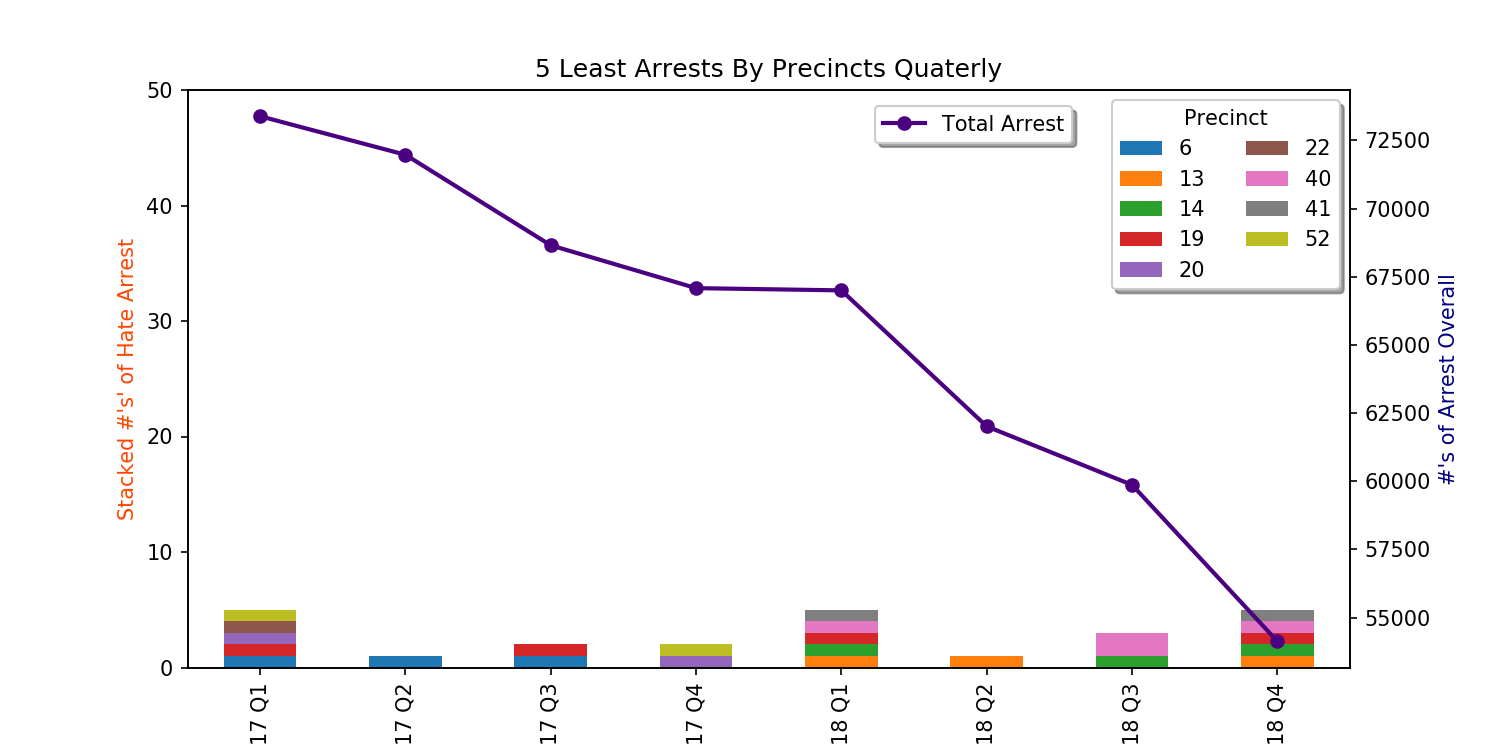

In [17]:

ax = T_least_filled.plot(kind='bar', use_index=True, stacked=True, figsize=(10,5))
ax.legend(loc='best', shadow=True, ncol=2, title = "Precinct")
ax.title.set_text("5 Least Arrests By Precincts Quaterly")
ax.set_ylabel("Stacked #'s' of Hate Arrest", color="orangered")
ax.set_ylim(0,50)
ax2 = ax.twinx()
ax2.plot(TT_sum_dfs, linestyle='-', marker='o', linewidth=2.0, label='Total Arrest', color="indigo")
ax2.set_ylabel("#'s of Arrest Overall", color="navy")
ax2.legend(bbox_to_anchor = [.77, 0.99], shadow=True)
plt.show()
plt.savefig("5 Least Arrest By Precincts Quaterly")

In [18]:
#Rates and Percentages in a table.
TT_sum_dfs.head()

,Total Arrest Overall
17 Q1,73386
17 Q2,71973
17 Q3,68652
17 Q4,67082
18 Q1,67000


In [28]:
Tjoined_1718_dfs = joined_1718_dfs.T
sum_joined_1718_dfs = Tjoined_1718_dfs.sum()
Total_Hate = pd.DataFrame({"Total Hate Arrests": sum_joined_1718_dfs})
Total_Hate.head()

,Total Hate Arrests
17 Q1,34.0
17 Q2,53.0
17 Q3,30.0
17 Q4,38.0
18 Q1,19.0


In [147]:
merge_dfs= Total_Hate.join(TT_sum_dfs, lsuffix='Total Hate Arrests', rsuffix='Total Arrest Overall',how='outer')
merge_dfs.head(8)

,Total Hate Arrests,Total Arrest Overall
17 Q1,34.0,73386
17 Q2,53.0,71973
17 Q3,30.0,68652
17 Q4,38.0,67082
18 Q1,19.0,67000
18 Q2,44.0,62013
18 Q3,34.0,59867
18 Q4,19.0,54132


In [43]:
merge_dfs['Percentage'] = merge_dfs['Total Hate Arrests']/merge_dfs['Total Arrest Overall']*100
merge_dfs.head(8)

,Total Hate Arrests,Total Arrest Overall,Percentage
17 Q1,34.0,73386,0.046330
17 Q2,53.0,71973,0.073639
17 Q3,30.0,68652,0.043699
17 Q4,38.0,67082,0.056647
18 Q1,19.0,67000,0.028358
18 Q2,44.0,62013,0.070953
18 Q3,34.0,59867,0.056793
18 Q4,19.0,54132,0.035099


In [124]:
#Hate by two years compare to overall %
total_A_1718 = results_1718.groupby("arrest_precinct")
Tcount_1718 = total_A_1718["arrest_key"].count()
Tsimplify_1718 = pd.DataFrame({"Total Arrest 2017 and 2018": Tcount_1718})
Tsimplify_1718.index.names = ['Precinct']
Tsimplify_1718['Total Arrest 2017 and 2018'] = Tsimplify_1718['Total Arrest 2017 and 2018'].astype('float64').astype(float)
Tsimplify_1718.index = Tsimplify_1718.index.map(str)
Tsimplify_1718.head()

,Total Arrest 2017 and 2018
Precinct,
1,5856.0
10,4342.0
100,3405.0
101,5410.0
102,7713.0


In [125]:
group_hate_17 = Total_Hate_2017.groupby("Precinct")
count_hate_17 = group_hate_17["Number"].count()

simplify_hate_17 = pd.DataFrame({"2017": count_hate_17})

group_hate_18 = Total_Hate_2018.groupby("Precinct")
count_hate_18 = group_hate_18["Number"].count()

simplify_hate_18 = pd.DataFrame({"2018": count_hate_18})
                                 

merge_1718_hate = [simplify_hate_17,simplify_hate_18]
joined_1718_hate= pd.concat(merge_1718_hate,axis=1, sort=False)

filled_1718_hate= joined_1718_hate.fillna(0)


,2017,2018
Precinct,,
1,2.0,7.0
5,0.0,2.0
6,3.0,4.0
7,5.0,1.0
9,3.0,2.0


In [145]:
filled_1718_hate['Hate Arrest 2017 and 2018'] = filled_1718_hate['2017']+filled_1718_hate['2018']
only_hate_1718= filled_1718_hate.drop(columns=['2017', '2018'])
Tsimplify_1718.index = Tsimplify_1718.index.astype(int)

In [159]:
merge_1718_all = [only_hate_1718,Tsimplify_1718]
joined_1718_all= pd.merge(only_hate_1718, Tsimplify_1718, how='outer', left_index=True, right_index=True, sort=False)
filled_joined_1718_all = joined_1718_all.fillna(0)
filled_joined_1718_all['Percentage'] = filled_joined_1718_all['Hate Arrest 2017 and 2018']/filled_joined_1718_all["Total Arrest 2017 and 2018"]*100
filled_joined_1718_all

,Hate Arrest 2017 and 2018,Total Arrest 2017 and 2018,Percentage
Precinct,,,
1,9.0,5856.0,0.153689
5,2.0,9727.0,0.020561
6,7.0,5913.0,0.118383
7,6.0,5009.0,0.119784
9,5.0,5185.0,0.096432
10,2.0,4342.0,0.046062
13,6.0,7158.0,0.083822
14,9.0,17734.0,0.050750
17,7.0,3188.0,0.219573


In [154]:
top_5_1718 = filled_joined_1718_all.nlargest(5, "Hate Arrest 2017 and 2018")
top_5_1718

,Hate Arrest 2017 and 2018,Total Arrest 2017 and 2018,Percentage
Precinct,,,
71,18.0,6858.0,0.262467
90,13.0,5803.0,0.224022
61,11.0,4863.0,0.226198
18,10.0,8803.0,0.113598
1,9.0,5856.0,0.153689


In [158]:
percentage_5_1718 = filled_joined_1718_all.nlargest(5, "Percentage")
percentage_5_1718

,Hate Arrest 2017 and 2018,Total Arrest 2017 and 2018,Percentage
Precinct,,,
66,9.0,2855.0,0.315236
22,1.0,337.0,0.296736
71,18.0,6858.0,0.262467
61,11.0,4863.0,0.226198
90,13.0,5803.0,0.224022
